In [23]:
import gym
from gym import Wrapper
import numpy as np
import math
import pygame
import time
import random

# Policy Iteration
here we are going to implement Policy Iteration in Forzen_Lake (one of the environmnet in OpenAi Gym library .
![title](Policy_itr.png)

In [24]:
def policy_iteration(P, nS, nA,env ,  gamma=0.9, tol=1e-4):
    '''
    parameters:
        P: transition probability matrix
        nS: number of states
        nA: number of actions
        gamma: discount factor
        tol: tolerance for convergence
    returns:
        value_function: value function for each state
        policy: policy for each state
    '''
    # initialize value function and policy

    value_function = np.zeros(nS)
    Policy = []
    Possible_actions = [0 , 1 , 2 , 3]
    '''
    action 0 : Move to the right
    acrion 1 : Move to the left
    action 2 : Move up
    actino 3 : Move down

    '''
    for i in range(nS) :
#         in this loop we add an action list to Policy list , we cinsider one possible_action list for each state
        Policy.append(Possible_actions)
    stable_policy = True
    counter = 0
#     while stable_policy == True :
    for i in range(1) :
        value_function = Policy_evaluation(Policy , env , nS  , gamma , value_function, theta = 0.01 )
        q = value_function
        stable_policy , Policy = Policy_Improvemnet(Policy , env , nS  , gamma , q, teta = 0.01)

    # Implement policy iteration here #
    return value_function, Policy

In [25]:
def Policy_evaluation(policy, env, nS, gamma, value_function, theta=0.01):
    counter = 0

    # Loop until the change in value is less than the threshold value
    while True:
        delta = -math.inf
        values = np.zeros(nS)

        # Loop through each state
        for state in range(nS):
            # Check if the state is a terminal state
            if state == 5 or state == 7 or state == 11 or state == 12:
                values[state] = 0
            # Check if the state is the final state
            elif state == 15:
                values[state] = 0
            else:
                # Initialize the new_value and number_of_actions variables
                new_value = 0
                number_of_actions = len(policy[state])
                for action in policy[state]:
                    # Loop through each possible outcome for the current action in the current state
                    for a in env.env.P[state][action]:
                        reward = 0
                        # Calculate the reward based on the outcome
                        if a[3] == True and a[1] == 15:
                            reward = 1
                        elif a[3] == True:
                            reward = -2
                        elif a[3] == False:
                            reward = 0
                        # Calculate the expected value for the current action in the current state
                        new_value += a[0] * (reward + gamma * value_function[a[1]]) / number_of_actions
                # Update the value for the current state
                values[state] = format(new_value, ".3f")
                # Update the delta variable
                delta = max(delta, np.abs(value_function[state] - values[state]))
        # Update the value function
        value_function = values
        # Increment the counter variable
        counter += 1
        if delta < theta:
            break
    # Return the updated value function
    return value_function


In [26]:
def Policy_Improvemnet(Policy, env, nS, gamma, value_function, teta=0.01):
    policy_stable = True
    updated_Policy = []
    for state in range(nS):
        max_value = -math.inf
        actions = []
        quality_of_actions = []
        new_policy = []
        # Get the number of actions for the current state
        number_of_actions = len(Policy[state])
        # Loop through each action in the policy for the current state
        for action in Policy[state]:
            # Initialize the new_value and counter variables
            new_value = 0
            counter = 0
            # Loop through each possible outcome for the current action in the current state
            for a in env.env.P[state][action]:
                # Initialize the reward variable
                reward = 0
                # Calculate the reward based on the outcome
                if a[3] == True and a[1] == 15:
                    reward = 1
                elif a[3] == True:
                    reward = -2
                elif a[3] == False:
                    reward = 0
                # Calculate the expected value for the current action in the current state
                new_value += a[0] * (reward + gamma * value_function[a[1]]) / number_of_actions
            # Update the max_value variable if the new_value is greater than the current max_value
            if max_value < new_value:
                max_value = new_value
            actions.append(action)
            quality_of_actions.append(new_value)
        for i in range(len(actions)):
            # If the quality of the action is within a small margin of the max_value, add the action to the new_policy list
            if max_value - 0.0001 < quality_of_actions[i]:
                new_policy.append(actions[i])
        # Add the new_policy to the updated_Policy list
        updated_Policy.append(new_policy)
    # Check if the updated policy is the same as the original policy
    if updated_Policy == Policy:
        policy_stable = False
    return policy_stable, updated_Policy


In [27]:
class CustomRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)

    def step(self, action):
        result = self.env.step(action)
        # modify the reward based on some co111ndition
        if result[1] == 1:
            result[1] = 1
        elif result[1] == 0:
            result[1] = -1
        else:
            result[1] = -2
        return result

    def reset(self):
        return self.env.reset()

# # create the FrozenLake environment
# env = gym.make('FrozenLake-v0')

# # create the reward wrapper
# wrapped_env = CustomRewardWrapper(env)

# # use the wrapped environment for training

In [28]:
def Operation_of_agent(Policy) :
#     in this function we run the environmenet with given policy
    env = gym.make("FrozenLake-v1", is_slippery=False , render_mode='human' )
    # run a random agent in the environment
    obs = env.reset()
    final_result = []
    done = False
    action = random.choice(Policy[0])
    while True :
        result  = env.step(action)
        action = random.choice(Policy[result[0]])


        if result[2] == True:
            break


    env.close()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
def final_table(values):
    matrix = np.zeros([4 , 4])

    for i in range (0, 4 ):
        for j in range(0 ,4) :
            matrix[i][j] = values[4*j + i]
    # plot the matrix as an image with an appropriate colormap
    plt.imshow(matrix.T, aspect='auto', cmap="bwr")

    # add the values
    for (i, j), value in np.ndenumerate(matrix):
        plt.text(i, j, "%.3f"%value, va='center', ha='center')

    plt.axis('off')
    plt.show()

Checking the results :\
First we adjust the discount factor :

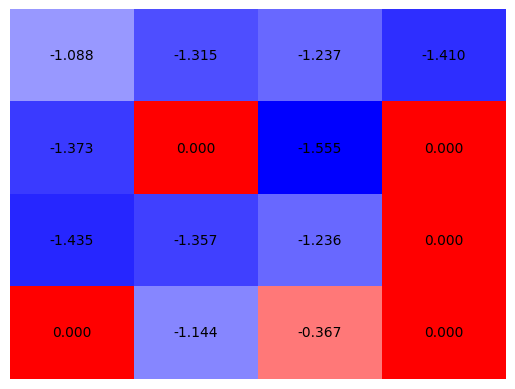

In [31]:
# discount factor = 1
new_env = gym.make("FrozenLake-v1", is_slippery=False )
new_env = CustomRewardWrapper(new_env)
state = new_env.reset()
pi , po = policy_iteration(new_env.P , new_env.observation_space.n , new_env.action_space.n , new_env,gamma =0.9  )

# Operation_of_agent(po)
final_table(pi)
